# Data Preprocessing

Data Preprocessing modelling with all the automatic features for preparing the dataset for running models:
    - Initialize
      Loading Files
    - Data Overview
        Describe, Head, Shape, Types
    - Data Cleaning
        Handling Missing Data
        Outlier Detection
        Handling Categorical Data
        Dummy Variables
    - Data Analysis    
        Plotting Distributions
    - Data Wrangling
        Slicing, Selecting, Aggregating
        Concatenate, Merge, Join
        Label Encoder
        One Hot Encoder (OHE)
        Label Binarizer (if necessary)
        Normalizer/Standarlizer
    - Featuring Engineering:
        Feature Extraction
        Dimensionality Reduction by PCA
        Feature Selection

# Initialize

In [2]:
# adicionado na versão de 11_2017
# %load_ext autotime
# %lsmagic
import pandas as pd         #pandas data manipulation
import numpy as np          #numpy arrays manipulation 
import missingno as msno    #missingno missing values
import gc                   #ram optimization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [3]:
# Setting working directory

path = '../MOZAIC/'

# Loading Files

In [4]:
# read the data from csv
df = pd.read_csv('HR_comma_sep.csv')

# Data Overview

In [5]:
# Return a tuple representing the dimensionality of the DataFrame.
print("Número de Linhas e Colunas")
df.shape
# view columns using df.columns
print("Apresenta as colunas do Dataset")
df.columns
# Return the dtypes in this object
print("Mostra os tipos de dados de cada coluna do Dataset")
df.dtypes
# Return the missing values in dataframe
print("Número de missing values no Dataframe")
df.isnull().values.any()

Número de Linhas e Colunas


(14999, 10)

Apresenta as colunas do Dataset


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

Mostra os tipos de dados de cada coluna do Dataset


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

Número de missing values no Dataframe


False

In [6]:
# Returns first n rows
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Return the count distinct values in single columns
for i in zip([df.columns.values]):
    print ('{}'.format(i))

(array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'sales', 'salary'], dtype=object),)


# Descriptive Statistics

In [ ]:
# Generates descriptive statistics that summarize the central tendency
df.describe()

In [6]:
# Return the count distinct values in single columns
for i in zip([df.mean()]):
    print('{}'.format(i))

(satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64,)


In [ ]:
# Return the value of skewness and kurtosis of dataframe
print ("skewness:"), df.skew()
print ("kurtosis:"), df.kurtosis() 

In [ ]:
# skewness
# skewness 0(normal), -1(left), +1(right)

for i, z in zip(df.skew(), list(df)):
    if i == 0:
        '{} {} {}'.format(z, i, 'is normal')
    elif i < 0:
        '{} {} {}'.format(z, i, 'is left')
    else:
        '{} {} {}'.format(z, i, 'is right')

In [ ]:
# kurtosis 
# kurtosis 3(normal), >3(upnormal), <3(subnormal)
for i, z in zip(df.kurtosis(), list(df)):
    if i == 3:
        '{} {} {}'.format(z, i, 'is normal')
    elif i < 3:
        '{} {} {}'.format(z, i, 'is subnormal')
    else:
        '{} {} {}'.format(z, i, 'is upnormal')

In [ ]:
# Visualize each feature's skewness as well - use seaborn pairplots
sns.pairplot(df)

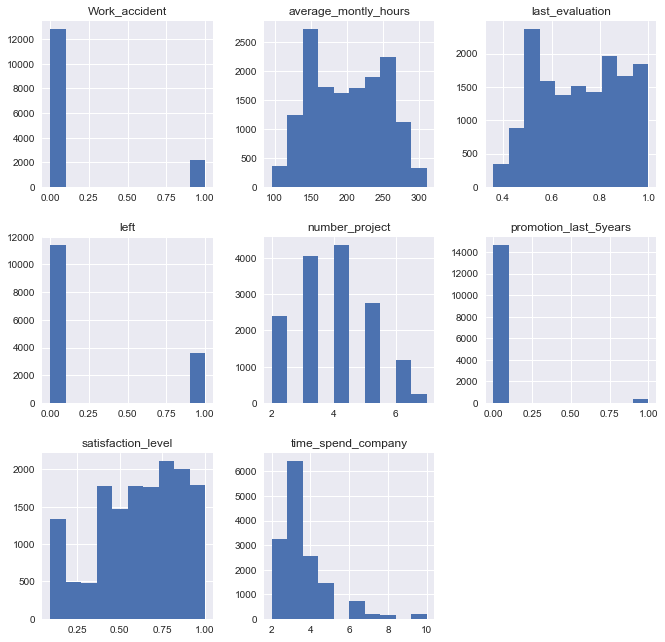

In [7]:
# Histogram of all dataframe
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")|(df.dtypes=="object")].index.values].hist(figsize=[11,11]);

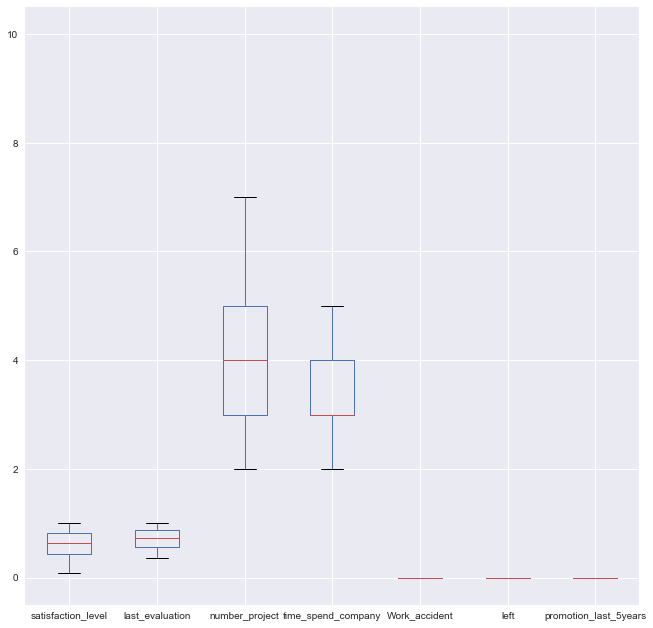

In [8]:
# BoxPlot less feature with great size difference
df.loc[:, df.columns != 'average_montly_hours'].plot.box(figsize=[11,11]);

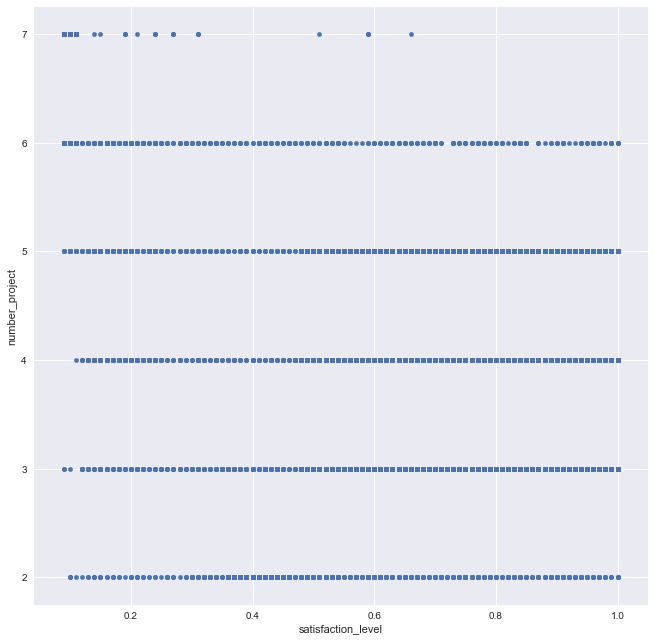

In [9]:
df.plot.scatter(x='satisfaction_level', y='number_project', figsize=[11,11]);

# Correlations

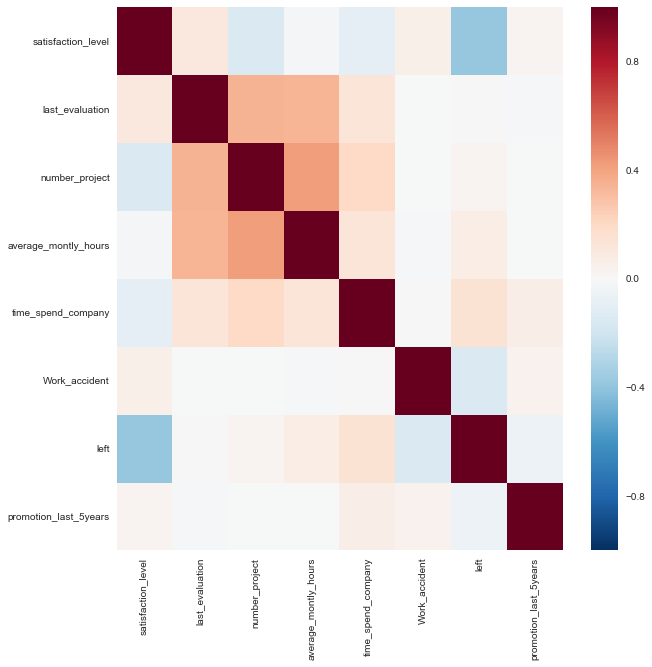

In [12]:
# Seaborn's heatmap version:
fig, ax = plt.subplots(figsize=(10,10)) 
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax);

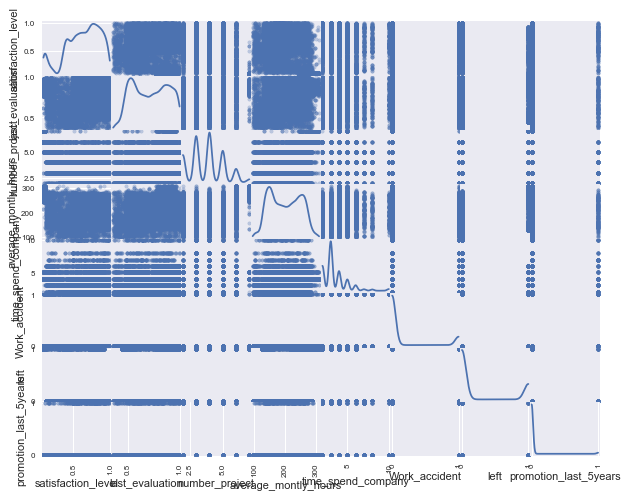

In [13]:
# Scatter Matrix:
pd.scatter_matrix(df, alpha = 0.3, figsize = (10,8), diagonal = 'kde');

# Group By

By “group by” we are referring to a process involving one or more of the following steps

    Splitting the data into groups based on some criteria
    Applying a function to each group independently
    Combining the results into a data structure

Of these, the split step is the most straightforward. In fact, in many situations you may wish to split the data set into groups and do something with those groups yourself. In the apply step, we might wish to one of the following:

    Aggregation: computing a summary statistic (or statistics) about each group. Some examples:
        Compute group sums or means
        Compute group sizes / counts
    
    Transformation: perform some group-specific computations and return a like-indexed. Some examples:
        Standardizing data (zscore) within group
        Filling NAs within groups with a value derived from each group
    
    Filtration: discard some groups, according to a group-wise computation that evaluates True or False. Some examples:
        Discarding data that belongs to groups with only a few members
        Filtering out data based on the group sum or mean

Some combination of the above: GroupBy will examine the results of the apply step and try to return a sensibly combined result 
if it doesn’t fit into either of the above two categories

In [94]:
%matplotlib inline

time: 154 ms


In [ ]:
df.groupby('sales').mean()

In [ ]:
df.groupby('sales').mean().plot(kind='bar');

In [ ]:
# Return the number of distinct values in each column
df.groupby(lambda idx: 'number').agg(['nunique']).transpose()

In [ ]:
df.groupby(lambda idx: 'number').nunique().plot(kind='bar')

# Outlier Detection

Dixon's Q-Test is used to help determine whether there is evidence for a given point to be an outlier of a 1D dataset. 
It is assumed that the dataset is normally distributed. Since we have very strong evidence that our dataset above is normal 
from all our normality tests, we can use the Q-Test here. As with the normality tests, we are assuming a significance level of 0.05 and for simplicity, we are only considering the smallest datum point in the set.

In [ ]:
def q_test_for_smallest_point(dataset):
    q_ref = 0.29  # the reference Q value for a significance level of 95% and 30 data points
    q_stat = (dataset[1] - dataset[0])/(dataset[-1] - dataset[0])
    
    if q_stat > q_ref:
        print("Since our Q-statistic is %f and %f > %f, we have evidence that our "
              "minimum point IS an outlier to the data.") %(q_stat, q_stat, q_ref)
    else:
        print("Since our Q-statistic is %f and %f < %f, we have evidence that our "
              "minimum point is NOT an outlier to the data.") %(q_stat, q_stat, q_ref)

In [ ]:
dataset = data[100:130]['10 Min Sampled Avg'].values.tolist()
dataset.sort()
q_test_for_smallest_point(dataset)

# Handling Missing Data

Existem valores nulos no dataframe e qual a soma desses valores nulos

In [19]:
df.isnull().sum().sum()

0

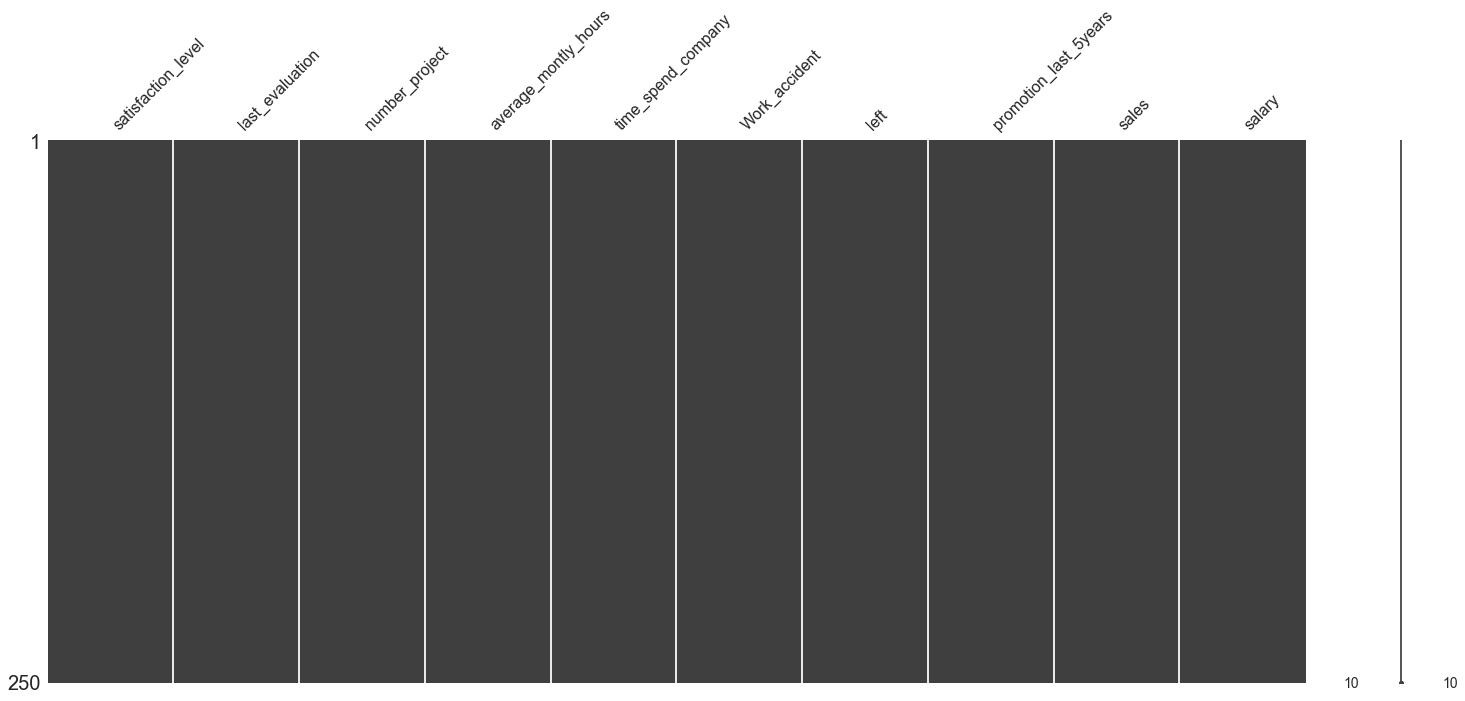

In [21]:
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(250))

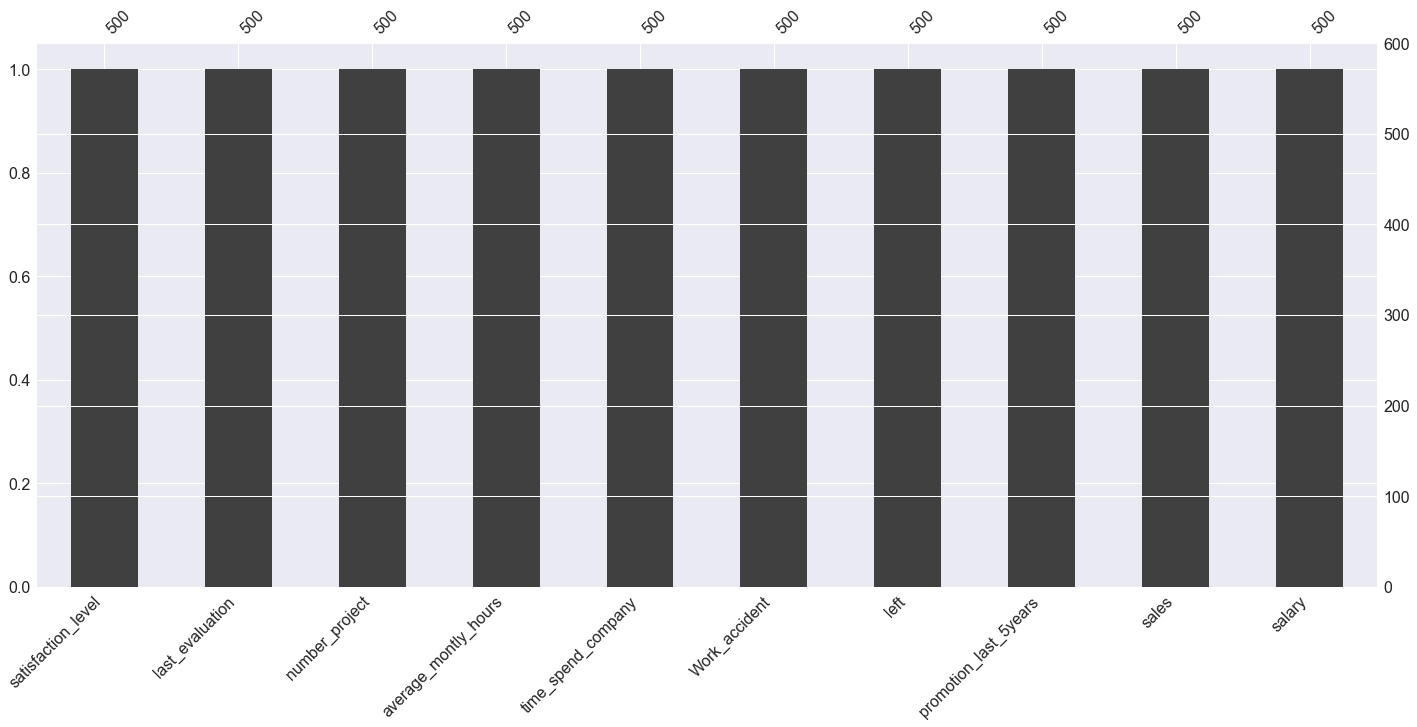

In [22]:
msno.bar(df.sample(500))

In [ ]:
# retirar os valores nulos do dataframe
df_no_missing = df.dropna()

# Target & Estimators

In [5]:
# Set the target by dataframe column name 
y = df['left']

In [6]:
dummy_df = pd.get_dummies(df, prefix='salary', columns=['salary'])

In [7]:
dummy_df.drop(['sales'], axis=1, inplace=True)

In [8]:
# Set the estimators by dataframe columns name exclude the target variable
X = dummy_df.loc[:, dummy_df.columns != 'left']

In [9]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

# Handling categorical data 

Label Encoder

One Hot Encoder (OHE)



# Label Encoder

In [ ]:
# TODO: create a LabelEncoder object and fit it to each feature in X
# import preprocessing from sklearn
from sklearn import preprocessing

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X = X.apply(le.fit_transform)

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
y = y.apply(le.fit_transform)


# One Hot Encoder (OHE)

In [ ]:
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X)

# 3. Transform

# onehotlabels = enc.transform(X).toarray()
onehotlabels = enc.transform(X).toarray()
onehotlabels.shape

# as you can see, you've the same number of rows 891
# but now you've so many more columns due to how we changed all the categorical data into numerical data

# Testing feature importantes with Random Forest

In [ ]:
# colcoar -1 em todos os missing values
df.fillna(-1, inplace=True)

In [27]:
# training random forest to test feature importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
rf.fit(X, y)
features = X.columns.values
print("----- Training Done -----")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=0.2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

----- Training Done -----


In [28]:
def get_feature_importance_df(feature_importances, 
                              column_names, 
                              top_n=25):
    """Get feature importance data frame.
 
    Parameters
    ----------
    feature_importances : numpy ndarray
        Feature importances computed by an ensemble 
            model like random forest or boosting
    column_names : array-like
        Names of the columns in the same order as feature 
            importances
    top_n : integer
        Number of top features
 
    Returns
    -------
    df : a Pandas data frame
 
    """
     
    imp_dict = dict(zip(column_names, 
                        feature_importances))
    top_features = sorted(imp_dict, 
                          key=imp_dict.get, 
                          reverse=True)[0:top_n]
    top_importances = [imp_dict[feature] for feature 
                          in top_features]
    df = pd.DataFrame(data={'feature': top_features, 
                            'importance': top_importances})
    return df

In [29]:
feature_importance = get_feature_importance_df(rf.feature_importances_, features)

In [30]:
feature_importance


,feature,importance
0,satisfaction_level,0.308676
1,number_project,0.225034
2,time_spend_company,0.176314
3,average_montly_hours,0.147017
4,last_evaluation,0.114541
5,Work_accident,0.012016
6,salary_high,0.006814
7,salary_low,0.006419
8,salary_medium,0.001985
9,promotion_last_5years,0.001185


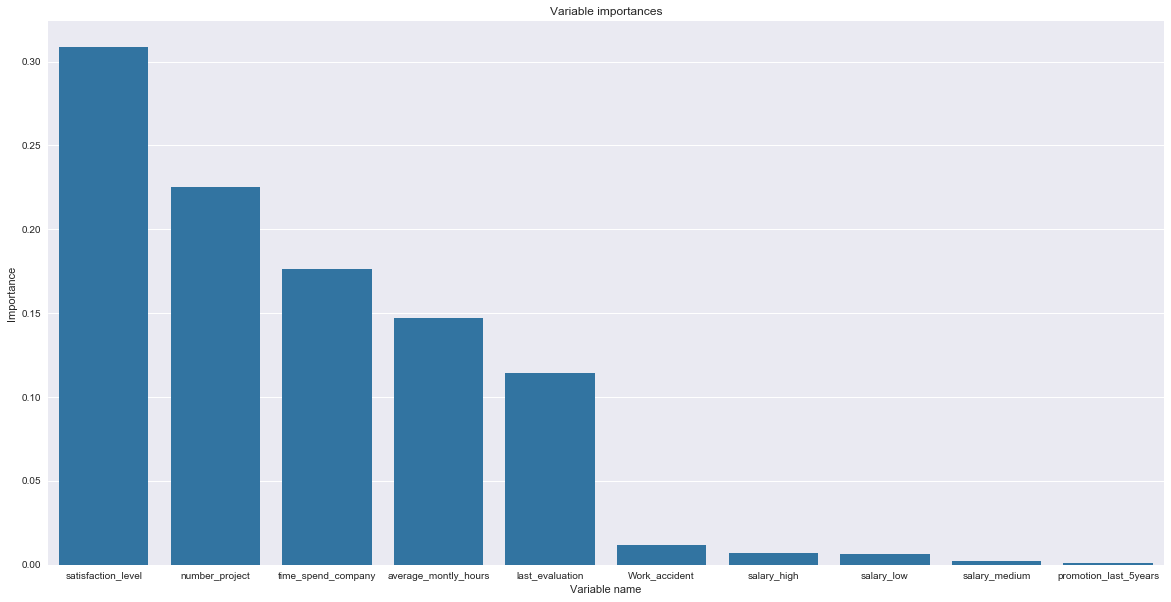

In [33]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.barplot(data=feature_importance[:10],x="feature",y="importance",ax=ax,color='#1f77b4',)
ax.set(xlabel='Variable name', ylabel='Importance',title="Variable importances");

# Feature Selection

In machine learning and statistics, feature selection, also known as variable selection, attribute selection or 
variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use 
in model construction. Feature selection techniques are used for four reasons:
- simplification of models to make them easier to interpret by researchers/users,
- shorter training times,
- to avoid the curse of dimensionality,
- enhanced generalization by reducing overfitting[2] (formally, reduction of variance[1])
The central premise when using a feature selection technique is that the data contains many features that are either 
redundant or irrelevant, and can thus be removed without incurring much loss of information.
Redundant or irrelevant features are two distinct notions, since one relevant feature may be redundant in the presence 
of another relevant feature with which it is strongly correlated.

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

skb = SelectKBest(chi2, k=4)
skb.fit(X, y)
X_new = skb.transform(X)

X_new.shape

skb.get_params()






SelectKBest(k=4, score_func=<function chi2 at 0x0000020C4916A8C8>)

(14999, 4)

{'k': 4,
 'score_func': <function sklearn.feature_selection.univariate_selection.chi2>}

In [68]:
print(skb.get_params())

{'k': 4, 'score_func': <function chi2 at 0x0000020C4916A8C8>}


In [69]:
feature_selection = skb.get_support(indices=True)

In [70]:
feature_selection

array([0, 3, 5, 7], dtype=int64)

In [71]:
def indices():
    for i in feature_selection:
        yield X.columns[i]

In [72]:
alfa = indices()

In [73]:
fs_variables = list(alfa)

In [74]:
fs_variables

['satisfaction_level', 'average_montly_hours', 'Work_accident', 'salary_high']

# Feature Scalling

Feature scaling is the method to limit the range of variables so that they can be compared on common grounds. It is performed on continuous variables. Lets plot the distribution of all the continuous variables in the data set.

The processo for feature scalling are:
    - Rescale Data
    - Standardize Data
    - Normalize Data

# Rescale Data

In [ ]:
# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

# Standardize Data

In [ ]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
import pandas
import numpy
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

# Normalize Data

In [ ]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
import pandas
import numpy
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(normalizedX[0:5,:])

# Binarize Data (Make Binary)

Label Binarizer
Binarize labels in a one-vs-all fashion
Several regression and binary classification algorithms are available in the scikit. A simple way to extend these algorithms to the multi-class classification case is to use the so-called one-vs-all scheme.
At learning time, this simply consists in learning one regressor or binary classifier per class. In doing so, one needs to convert multi-class labels to binary labels (belong or does not belong to the class). LabelBinarizer makes this process easy with the transform method.

In [ ]:
# binarization
from sklearn.preprocessing import Binarizer
import pandas
import numpy
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(binaryX[0:5,:])

In [ ]:
def featurize(features):
  transformations = [
                            ('Embarked', LabelBinarizer()),
                            ('Fare', None),
                            ('Parch', None),
                            ('Pclass', LabelBinarizer()),
                            ('Sex', LabelBinarizer()),
                            ('SibSp', None),                                       
                            ('Title', LabelBinarizer()),
                            ('FamilySize', None),
                            ('FamilyID', LabelBinarizer()),
                            ('AgeOriginallyNaN', None),
                            ('AgeFilledMedianByTitle', None)]

  return DataFrameMapper(filter(lambda x: x[0] in df.columns, transformations))